*Iris Flower Classification*arn.arn.

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

In [25]:
column_names = ['sepal_length','sepal_width','petal_length','petal_width','class']
data = pd.read_csv('iris.data.csv',names=column_names)

data.head(5)

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [27]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [29]:
data['class'].value_counts()

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [13]:
data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
class           0
dtype: int64

Visualize the Data

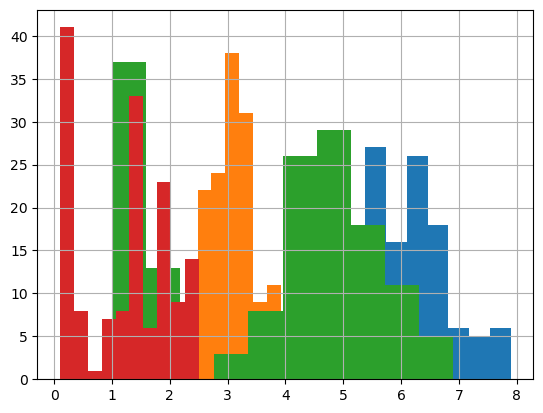

In [18]:
columns = ['sepal_length','sepal_width','petal_length','petal_width']
for i in columns:
    data[i].hist()

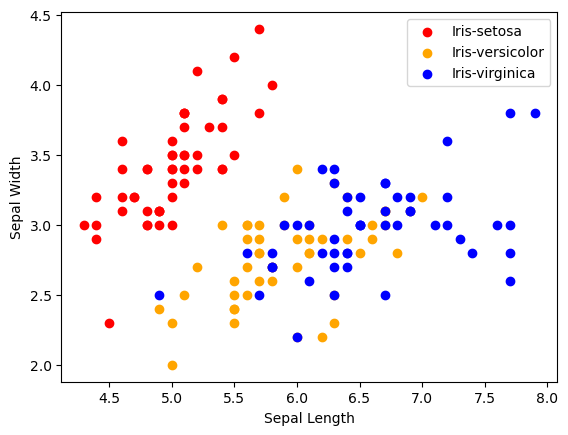

In [32]:
colors = ['red','orange','blue']
species = ['Iris-setosa','Iris-versicolor','Iris-virginica']
for i in range(3):
    x = data[data['class']==species[i]]
    plt.scatter(x['sepal_length'],x['sepal_width'],c=colors[i],label=species[i])
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend()

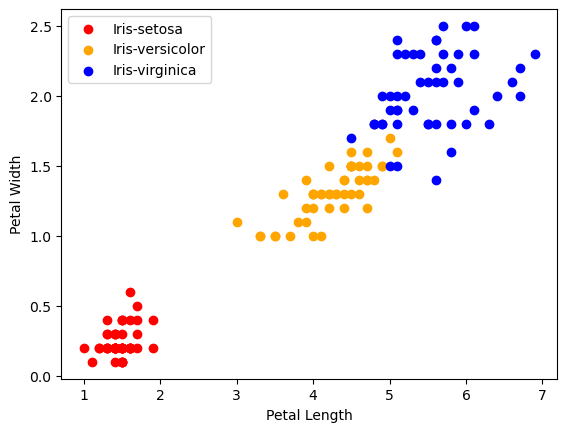

In [34]:
for i in range(3):
    x = data[data['class']==species[i]]
    plt.scatter(x['petal_length'],x['petal_width'],c=colors[i],label=species[i])
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.legend()

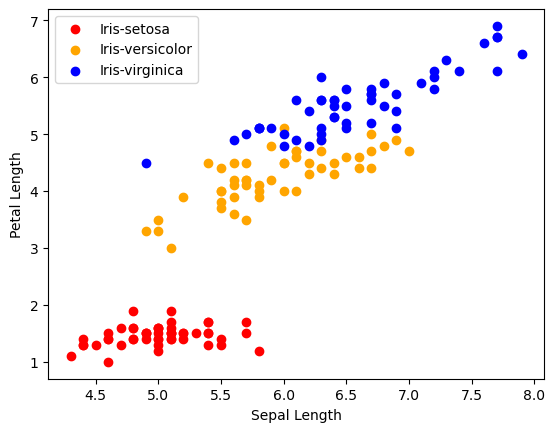

In [36]:
for i in range(3):
    x = data[data['class']==species[i]]
    plt.scatter(x['sepal_length'],x['petal_length'],c=colors[i],label=species[i])
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')
plt.legend()

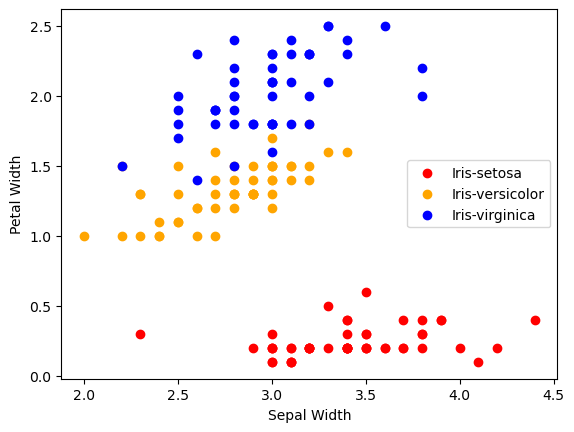

In [38]:
for i in range(3):
    x = data[data['class']==species[i]]
    plt.scatter(x['sepal_width'],x['petal_width'],c=colors[i],label=species[i])
plt.xlabel('Sepal Width')
plt.ylabel('Petal Width')
plt.legend()

In [97]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['class'] = le.fit_transform(data['class'])

In [99]:
data['class'].head()

0    0
1    0
2    0
3    0
4    0
Name: class, dtype: int64

In [101]:
import seaborn as sns

<Axes: >

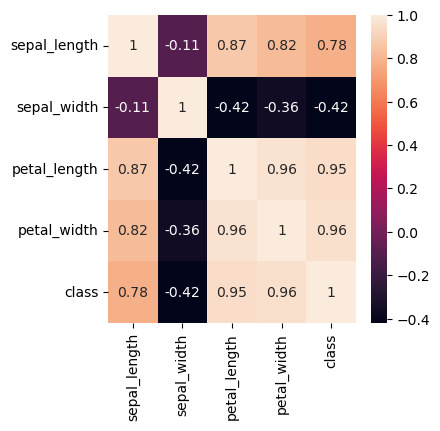

In [103]:
coor = data.corr()
fid, ax = plt.subplots(figsize=(4,4))
sns.heatmap(coor,annot = True, ax = ax)

In [104]:
from sklearn.model_selection import train_test_split
x_data = data.drop('class',axis=1)
y_data = data['class']

In [105]:
x_data.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [109]:
y_data.head()

0    0
1    0
2    0
3    0
4    0
Name: class, dtype: int64

In [111]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.2)

In [113]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [115]:
y_pred = model.predict(x_test)
y_pred

array([2, 2, 2, 1, 1, 0, 1, 2, 2, 0, 2, 0, 2, 0, 0, 0, 1, 2, 0, 0, 2, 2,
       2, 2, 2, 0, 2, 0, 2, 1], dtype=int64)

In [117]:
y_test

120    2
121    2
149    2
55     1
86     1
26     0
88     1
139    2
113    2
46     0
108    2
27     0
132    2
37     0
35     0
20     0
59     1
146    2
44     0
34     0
128    2
130    2
140    2
131    2
122    2
38     0
144    2
22     0
141    2
76     1
Name: class, dtype: int64

In [119]:
print("Accuracy: ",model.score(x_test, y_test))

Accuracy:  1.0
